In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [38]:
reviews = pd.read_csv('Musical_instruments_reviews.csv')
reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [39]:
print('dataset information: ' + str(reviews.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB
dataset information: None


In [40]:
reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [41]:
reviews.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [42]:
reviews['reviewText'] = reviews['reviewText'].fillna('missing')

In [43]:
reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [44]:
reviews['overall'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [45]:
### combine reviewText and summary and drop the columns

reviews['reviews'] = reviews['reviewText'] + reviews['summary']

reviews = reviews.drop(['reviewText', 'summary'], axis=1)

reviews.head()


,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [48]:
# create a sentiment function

def sentiment_analysis(ratings):
    if ratings['overall']== 3:
        value = 'Neutral'
    elif ratings['overall'] > 3:
        value ='Positive'
    else:
        value = 'Negative'
    return value

In [49]:
reviews['Sentiment'] = reviews.apply(sentiment_analysis, axis =1)
reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,Sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive


In [51]:
reviews['Sentiment'].value_counts()

Positive    9022
Neutral      772
Negative     467
Name: Sentiment, dtype: int64

In [52]:
#split the reviewTime

re_new =  reviews['reviewTime'].str.split(',', n=1, expand=True)
reviews['date'] = re_new[0]
reviews['year'] = re_new[1]

#split the date column
re_new1 = reviews['date'].str.split(' ', n=1, expand=True)
reviews['Month'] = re_new1[0]
reviews['day'] = re_new1[1]

reviews = reviews.drop(['reviewTime', 'date'], axis=1)

reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviews,Sentiment,year,Month,day
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,2014,02,28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,Positive,2013,03,16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,Positive,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,2014,02,14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,Positive,2014,02,21


In [53]:
reviews['year'].value_counts()

 2013    4055
 2014    2679
 2012    1936
 2011    1007
 2010     350
 2009     128
 2008      63
 2007      22
 2006      10
 2004       7
 2005       4
Name: year, dtype: int64

In [62]:
reviews.groupby(['year', 'Sentiment']).size()

year   Sentiment
 2004  Positive        7
 2005  Positive        4
 2006  Negative        1
       Neutral         1
       Positive        8
 2007  Negative        1
       Positive       21
 2008  Negative        2
       Neutral         7
       Positive       54
 2009  Negative        5
       Neutral         8
       Positive      115
 2010  Negative       16
       Neutral        20
       Positive      314
 2011  Negative       46
       Neutral        84
       Positive      877
 2012  Negative       85
       Neutral       130
       Positive     1721
 2013  Negative      170
       Neutral       319
       Positive     3566
 2014  Negative      141
       Neutral       203
       Positive     2335
dtype: int64

In [56]:
#remove unwanted columns

reviews.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'overall',
       'unixReviewTime', 'reviews', 'Sentiment', 'year', 'Month', 'day'],
      dtype='object')

In [57]:
reviews = reviews.drop(['reviewerName', 'unixReviewTime'], axis=1)
reviews.head()

,reviewerID,asin,helpful,overall,reviews,Sentiment,year,Month,day
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,"Not much to write about here, but it does exac...",Positive,2014,02,28
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.0,The product does exactly as it should and is q...,Positive,2013,03,16
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,The primary job of this device is to block the...,Positive,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.0,Nice windscreen protects my MXL mic and preven...,Positive,2014,02,14
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.0,This pop filter is great. It looks and perform...,Positive,2014,02,21


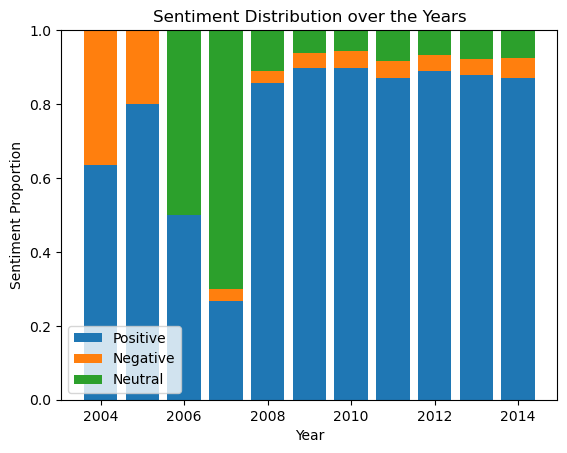

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
years = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
sentiments = ['Positive', 'Negative', 'Neutral']
count_data = [
    [7, 4, 0],
    [4, 1, 0],
    [1, 0, 1],
    [8, 1, 21],
    [54, 2, 7],
    [115, 5, 8],
    [314, 16, 20],
    [877, 46, 84],
    [1721, 85, 130],
    [3566, 170, 319],
    [2335, 141, 203]
]

# Convert the count_data into a NumPy array
count_data = np.array(count_data)

# Calculate the total count for each year
total_count = np.sum(count_data, axis=1)

# Normalize the count_data for plotting
normalized_data = count_data / total_count[:, None]

# Create the stacked bar plot
plt.bar(years, normalized_data[:, 0], label='Positive')
plt.bar(years, normalized_data[:, 1], bottom=normalized_data[:, 0], label='Negative')
plt.bar(years, normalized_data[:, 2], bottom=normalized_data[:, 0] + normalized_data[:, 1], label='Neutral')

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Sentiment Proportion')

# Set the title
plt.title('Sentiment Distribution over the Years')

# Add a legend
plt.legend()

# Display the plot
plt.show()
